# VIT-Vellore, SCOPE
## CSE6037 - Deep Learning and its Applications
### SUTHAR MANAN BHARATKUMAR 20MAI0016
### Assessment 3
***GitHub Link:*** https://github.com/manansuthar55/CSE6037_20MAI0016/tree/main/Assessment_3
#### Problem 1: Implement AlexNet on Multiclass image dataset.

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AlexNet/imgclassdl1/imgclassdl1/seg_train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 4439 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 1. 0. 0. 0. 0.]')

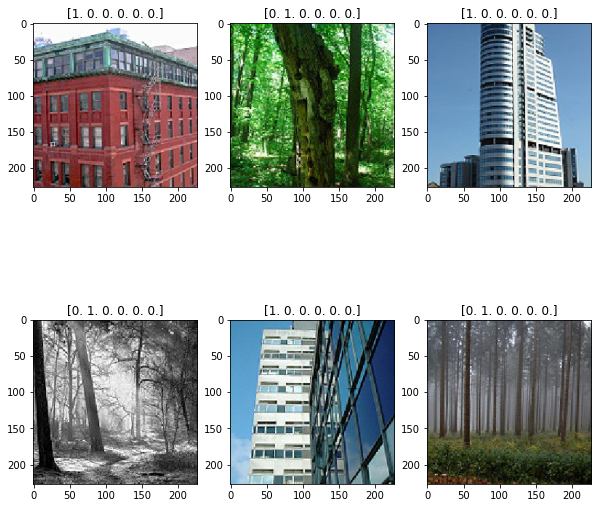

In [ ]:
fig , axs = plt.subplots(2,3,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][13])
axs[1][2].set_title(train[0][1][13])

## AlexNet Architecture

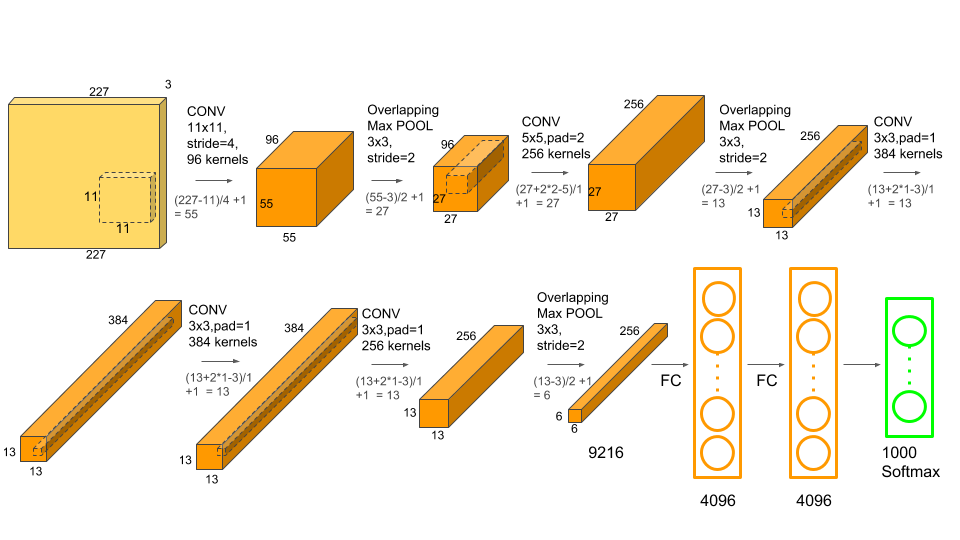

In [ ]:
def AlexNet(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    X = Flatten()(X)
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
ft = alex.fit_generator(train,epochs=10)
alex.save("alexnet_model.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
139/139 [==============================] - 1040s 7s/step - loss: 14.6168 - accuracy: 0.6698
Epoch 2/10
139/139 [==============================] - 645s 5s/step - loss: 0.3506 - accuracy: 0.8604
Epoch 3/10
139/139 [==============================] - 648s 5s/step - loss: 0.2527 - accuracy: 0.9053
Epoch 4/10
139/139 [==============================] - 643s 5s/step - loss: 0.1868 - accuracy: 0.9360
Epoch 5/10
139/139 [==============================] - 639s 5s/step - loss: 0.1550 - accuracy: 0.9474
Epoch 6/10
139/139 [==============================] - 633s 5s/step - loss: 0.1416 - accuracy: 0.9511
Epoch 7/10
139/139 [==============================] - 635s 5s/step - loss: 0.1324 - accuracy: 0.9529
Epoch 8/10
139/139 [==============================] - 641s 5s/step - loss: 0.1120 - accuracy: 0.9629
Epoch 9/10
139/139 [==============================] - 642s 5s/step - loss: 0.1125 - accuracy: 0.9590
Epoch 10/10
139/139 [==============================] - 652s 5s/step - loss: 0.0965 - accu

### Training Accuracy: 96.44%

In [ ]:
path_test = '/content/drive/MyDrive/Colab Notebooks/AlexNet/imgclassdl1/imgclassdl1/seg_test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
preds = alex.evaluate_generator(test)
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Accuracy = 0.28433331847190857


### Testing Accuracy: 28.44% 
As the model in trained for less epochs, so its weights and biases are not optimized... Hence less accuracy on test set.